In [21]:
import os
print(os.getcwd())

C:\Users\Prisca\Documents\bikeshare-2-1


In [22]:
print(os.getcwd())
import time
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt




C:\Users\Prisca\Documents\bikeshare-2-1


In [23]:
CITY_DATA = {'chicago': 'chicago.csv',
             'new york city': 'new_york_city.csv',
             'washington': 'washington.csv'}

In [24]:
def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!\n')
    # get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid input
    cities = ['chicago', 'new york city', 'washington']
    while True:
        city = input("Which of these cities do you want to explore: Chicago, New york city or Washington? \n>")
        if city.lower() not in cities:
            print('wrong option!Type in lower case \n')
        if city.lower() in cities:
            break

    # get user input for month (all, january, february, ... , june)
    months = ['all', 'january', 'february', 'march', 'april', 'may', 'june']
    while True:
        month = input("enter month \n {} \n>".format(months))
        if month in months:
            break



    # get user input for day of week (all, monday, tuesday, ... sunday)

    days = ['all', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'sunday']
    while True:
        day = input("enter day \n {} \n>".format(days))
        if day in days:
            break

    print('-' * 40)
    return city, month, day

In [25]:
def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - pandas DataFrame containing city data filtered by month and day
    """ # load data file into a dataframe
    
    df =  pd.read_csv(os.getcwd() + '\\' + CITY_DATA.get(city))


    # convert the Start Time column to datetime
    df["Start Time"] =  pd.to_datetime(df["Start Time"])

    # extract month and day of week from Start Time to create new columns
    df['month'] = pd.to_datetime(df['Start Time']).dt.month
    df['day_of_week'] =  pd.to_datetime(df['Start Time']).dt.day_name()
    df['hour'] = df['Start Time'].dt.hour
    


    # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['all','january', 'february', 'march', 'april', 'may', 'june']
        #month =  input('Enter the month'.format(months))
        month_index = months.index(month)
    
        # filter by month to create the new dataframe
        df = df[df.month == month_index]

    # filter by day of week if applicable
    if day != 'all':
        # filter by day of week to create the new dataframe
        df =  df[(df.day_of_week) == day.title()]
    
    return df

In [26]:
def time_stats(df):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    # display the most common month
    modal_month = df['month'].mode()[0]
    print('The most common month gotten from the already sorted data is: ', modal_month)
    # display the most common day of week
    modal_weekday = df['day_of_week'].mode()[0]
    print('The most common day of the week gotten from the already sorted data is: ', modal_weekday)

    # display the most common start hour
    modal_hour = df['hour'].mode()[0]
    print('The most common hour gotten from the already sorted data is: ', modal_hour)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)
    
    

    df['hour'].value_counts().plot(kind = 'bar')
    plt.xlabel("hour")
    plt.ylabel('Frequency distribution')
    plt.show()
    print("It can be seen that the" , modal_hour ," hour is the most popular")

In [27]:
def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    
    most_common_start_station=  df['Start Station'].mode()[0]
    print('most commonly used start station', most_common_start_station)
    
    most_common_end_station = df['End Station'].mode()[0]
    print("most commonly used end station" , most_common_end_station)
    
    
    most_frequent_start_and_end_station = df.groupby(['Start Station','End Station']).size().nlargest(1)
    print("most frequent combination of start",most_frequent_start_and_end_station)
    
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

In [28]:
def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""
 
    print('\nCalculating Trip Duration...\n')
    start_time = time.time()
 

    total_travel = df['Trip Duration'].sum()
    print("Total travel time:", total_travel)
 

    mean_travel = df['Trip Duration'].mean()
    print("mean travel time:", mean_travel)
 
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

In [ ]:
def user_stats(df):
    """Displays statistics on bikeshare users."""
 
    print('\nCalculating User Stats...\n')
    start_time = time.time()
    
 #display the counts of user types
    user_types = df['User Type'].value_counts()
    print(user_types)
    user_group = df.groupby('User Type').count()
    print(user_group) 
# Display counts of gender
    if 'Gender' in df:
        gender = df['Gender'].value_counts()
        print(gender)
        df['Gender'].value_counts().plot(kind = 'bar')
        plt.xlabel("Gender")
        plt.ylabel('Frequency distribution')
        plt.show()
        
        
        
    else:
        print("There is no gender information in this city.")
 
 
# Display earliest, most recent, and most common year of birth
    if 'Birth Year' in df:
        earliest = df['Birth Year'].min()
        print("The earliest birth year is" , earliest)
        recent = df['Birth Year'].max()
        print("The most recent birth  year is", recent)
        common_birth = df['Birth Year'].mode()[0]
        print("The most common birth year is" , common_birth)
    else:
        print("There is no birth year information in this city.")
 
        print("\nThis took %s seconds." % (time.time() - start_time))
        print('-'*40)

Hello! Let's explore some US bikeshare data!

Which of these cities do you want to explore: Chicago, New york city or Washington? 
>chicago
enter month 
 ['all', 'january', 'february', 'march', 'april', 'may', 'june'] 
>march
enter day 
 ['all', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'sunday'] 
>sunday
----------------------------------------

Calculating The Most Frequent Times of Travel...

The most common month gotten from the already sorted data is:  3
The most common day of the week gotten from the already sorted data is:  Sunday
The most common hour gotten from the already sorted data is:  15

This took 0.009788751602172852 seconds.
----------------------------------------


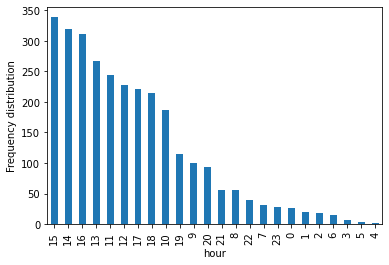

It can be seen that the 15  hour is the most popular

Calculating The Most Popular Stations and Trip...

most commonly used start station Streeter Dr & Grand Ave
most commonly used end station Streeter Dr & Grand Ave
most frequent combination of start Start Station          End Station       
Calumet Ave & 33rd St  State St & 33rd St    9
dtype: int64

This took 0.021899938583374023 seconds.
----------------------------------------

Calculating Trip Duration...

Total travel time: 2743463
mean travel time: 934.103847463398

This took 0.0020051002502441406 seconds.
----------------------------------------

Calculating User Stats...

Subscriber    2290
Customer       647
Name: User Type, dtype: int64
            Unnamed: 0  Start Time  End Time  Trip Duration  Start Station  \
User Type                                                                    
Customer           647         647       647            647            647   
Subscriber        2290        2290      2290           229

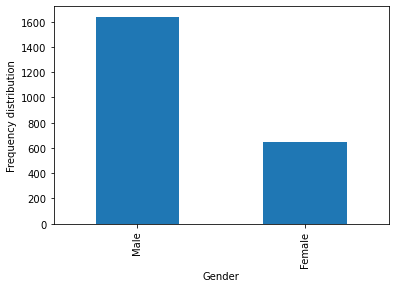

1899.0
1999.0
1989.0


In [ ]:

def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
	main()
